<img src="https://camscanada.com/img/CarGurus.png" width=600>

---

## **Driving the Future of Vehicle Pricing: A Machine Learning Approach**

### **Part 3 - Modeling**

**By: Robby Khoutsaysana**

---

## **Introduction**

Modeling is the process of creating a mathematical representation of a system or phenomenon. In this project, we aim to build a predictive model for our target variable, based on the features we have collected in our dataset. The goal of the modeling process is to find the best fitting mathematical function that describes the relationship between the features and the target variable.

In order to build a model for our data, we will have to make several decisions. First, we will have to select the type of model we want to build, such as a linear regression, decision tree, random forest, or neural network. Next, we will have to split the data into training and testing sets, and use the training set to train our model. After the model has been trained, we will evaluate its performance on the testing set and make adjustments to the model if necessary.

Once the model has been fully developed and evaluated, we can use it to make predictions on new, unseen data. By building a predictive model, we can gain insight into the relationship between the features and the target variable, and make informed predictions about future outcomes.

---


Let's start by importing the necessary libraries and the cleaned dataset.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Importing the data
df = pd.read_csv("cars_cleaned.csv", index_col='vin')

In [3]:
df.sample(5)

,daysonmarket,has_incidents,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,combined_fuel_economy,...,model_name_Silverado 1500,model_name_Trax,seller_rating_3 stars,seller_rating_4 stars,transmission_CVT,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
vin,,,,,,,,,,,,,,,,,,,,,
3C4PDDGG4GT117137,33,False,283.000,7,99445.000,9.535,1111,260.000,2016,20.000,...,0,0,0,1,0,0,0,1,0,0
1FMCU0G61LUA22593,323,False,180.000,5,5.000,9.967,0,264.273,2020,30.000,...,0,0,0,1,0,0,0,0,1,0
5UXTY5C00M9D90423,19,False,170.000,5,12.000,10.888,0,264.273,2021,26.083,...,0,0,0,1,0,0,0,0,1,0
KL4MMCSL1LB075775,215,False,150.000,5,20.000,10.172,0,174.000,2020,27.500,...,0,0,1,0,0,0,0,0,0,0
1C4PJMLB8LD569482,274,False,270.000,5,14.000,10.344,0,239.000,2020,25.000,...,0,0,0,1,0,0,0,0,0,0


In [4]:
df.shape

(2625910, 69)

Great! Now we have imported the necessary libraries and the cleaned dataset. Let's begin by preparing the data for model building.

------------------------------------------------------------------------------------------

## **Data Preparation**

Here we will be preparing the data for model building. We will be splitting the data into training and testing sets. We will also be creating a validation set from the training set. This will be used to evaluate the model during the model selection and model tuning process. 

In [5]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
 
 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # setting random_state to get the same sample every time

Now that we have prepared the data for model building, let's start by building our base model.

---

## **Model Building**

In this section we will be building our base model. We will be using the Linear Regression model to build our base model. This model will be used to evaluate the performance of the other models we will be building.

We will be using the following models to predict the price of a vehicle:

* Linear Regression - Base Model
* Random Forest - Bagging Model
* LightGBM - Boosting Model
* XGBoost - Extreme Gradient Boosting Model
* Neural Network (ANN) - Artificial Neural Network Model

To start, let's scale the data using the StandardScaler. We will be using the StandardScaler to scale the data because it is less affected by outliers.

In [6]:
# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test data
X_test_scaled = scaler.transform(X_test)

### **Linear Regression**

Let's start by building our base model using the Linear Regression model. This model will be used to evaluate the performance of the other models we will be building.

In [7]:
# importing the necessary libraries
from sklearn.linear_model import LinearRegression

# instantiating the model
lr = LinearRegression()
 
# fitting the model to the training data
lr.fit(X_train_scaled, y_train)

# predicting on the test set
lr_pred = lr.predict(X_test_scaled)

In order to measure the performance of the model, we will be using the following metrics:

* R-Squared (R2) - This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The R2 score ranges from 0 to 1. The higher the R2 score, the better the model fits the data.
* Mean Absolute Error (MAE) - This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. The lower the MAE, the better the model fits the data.
* Root Mean Squared Error (RMSE) - This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. The lower the RMSE, the better the model fits the data.
* Mean Absolute Percentage Error (MAPE) - This metric measures the average magnitude of the percentage errors in a set of predictions, without considering their direction. The lower the MAPE, the better the model fits the data.

`Model Accuracy` - In order to calculate the accuracy for a regression problem on predicting the price of a vehicle, we will be using the following formula:
 
$$Accuracy = 1 - \frac{MAPE}{100}$$ 

This formula calculates the accuracy of the model by subtracting the MAPE from 100. The higher the accuracy, the better the model. Though this is not a perfect metric to measure the accuracy of the model, it is the best metric we can use for this problem since we are predicting the price of a vehicle.

Because this is a regression problem, we will focus on the loss metrics (MAE, RMSE, MAPE) to evaluate the performance of the model. The accuracy of the model and the R2 score are not as important as the loss metrics.

In [8]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, lr_pred))

# calculating the MSE
print('MSE:', mse(y_test, lr_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, lr_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.8182412366455343
MSE: 0.04726208179892682
RMSE: 0.21739844019432802
MAPE: 1.5104168320582347
Model Accuracy: 0.9848958316794176


Great! Looking at the results, we can see that the Linear Regression model is scoring very well.

---

### **Random Forest**

The Random Forest model is a bagging model. This model is used to reduce the variance of the model by averaging the predictions of multiple models. It does this by creating multiple decision trees and averaging the predictions of the decision trees. Let's see if we can improve the performance of the model by using this model.

Note: In this model we will not be scaling the data. This is because a Random Forest model is not affected by the scale of the data.

Let's start by preparing the data for model building.

In [6]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
 
 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Next, let's build our Random Forest model.

In [7]:
# importing the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor
 
# instantiating the model
rf = RandomForestRegressor()
 
# fitting the model to the training data
rf.fit(X_train, y_train)
 
# predicting on the test set
rf_pred = rf.predict(X_test)

In [8]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, rf_pred))
 
# calculating the MSE
print('MSE:', mse(y_test, rf_pred))
 
# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, rf_pred)))
 
# calculating the MAPE
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100
 
print('MAPE:', mape)
 
# calculating the Accuracy
model_accuracy = 1 - mape/100
 
print('Model Accuracy:', model_accuracy)

R2 score:  0.9598876479853374
MSE: 0.010430271570274478
RMSE: 0.10212870101139286
MAPE: 0.6602811381555158
Model Accuracy: 0.9933971886184448


The results of the Random Forest model are very good. Let's see if we can improve the performance of the model by tuning the model. Let's do a grid search to find the best parameters for the model.

In [21]:
# finding the best parameters for the model
from sklearn.model_selection import GridSearchCV
 
# creating a dictionary of hyperparameters
params = {'n_estimators': [200, 300], 'max_depth': [20, 30], 'n_jobs': [-1]}
    
# instantiating the grid search
grid = GridSearchCV(rf, params, cv=5)
 
# fitting the grid search
grid.fit(X_train, y_train)
 
# printing the best parameters
print(grid.best_params_)

{'max_depth': 30, 'n_estimators': 300, 'n_jobs': -1}


Now that we have our optimal parameters, let's build our model using the optimal parameters.

In [8]:
# importing the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# instantiating the model with the best parameters
rf = RandomForestRegressor(max_depth=30,
                           n_estimators=300,
                           n_jobs=-1,
                           random_state=1)
 
# fitting the model to the training data
rf.fit(X_train, y_train)
 
# predicting on the test set
rf_pred = rf.predict(X_test)

In [9]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, rf_pred))
 
# calculating the MSE
print('MSE:', mse(y_test, rf_pred))
 
# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, rf_pred)))
 
# calculating the MAPE
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100
 
print('MAPE:', mape)
 
# calculating the Accuracy
model_accuracy = 1 - mape/100
 
print('Model Accuracy:', model_accuracy)

R2 score:  0.9600476705709822
MSE: 0.010388661469100583
RMSE: 0.10192478339001061
MAPE: 0.6664469897568854
Model Accuracy: 0.9933355301024311


It seems that tuning the model did improve the overall performance of the model. Let's see if we can find a better model that can perform better than the Random Forest model.

---

### **LightGBM**
 
The LightGBM model is a gradient boosting machine model that uses a tree-based model to predict the price of a vehicle. 

It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.

More information about LightGBM can be found here: https://lightgbm.readthedocs.io/en/latest/

**NOTE**: The LightGBM model is not available in the sklearn library. We will be using the LightGBM library to build the model. To install the LightGBM library, run the following command in the terminal:

    pip install lightgbm

In [14]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)
 
# predicting on the test set
lgbm_pred = lgbm.predict(X_test)

In [15]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, lgbm_pred))
 
# calculating the MSE
print('MSE:', mse(y_test, lgbm_pred))
 
# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, lgbm_pred)))
 
# calculating the MAPE
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100
 
print('MAPE:', mape)
 
# calculating the Accuracy
model_accuracy = 1 - mape/100
 
print('Model Accuracy:', model_accuracy)

R2 score:  0.927352339709627
MSE: 0.01889031153038979
RMSE: 0.13744202970849126
MAPE: 0.9803337768520409
Model Accuracy: 0.9901966622314796


The results of the LightGBM model is very good. Let's try and input some parameters to see if we can improve the score.

In [16]:
# importing the necessary libraries for LightGBM
import lightgbm as lgb

# instantiating the model
lgbm = lgb.LGBMRegressor(n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=32,
                         colsample_bytree=0.2,
                         reg_alpha=3, 
                         reg_lambda=1, 
                         min_split_gain=0.01,
                         min_child_weight=40,
                         random_state=1)

# fitting the model to the training data
lgbm.fit(X_train, y_train)
 
# predicting on the test set
lgbm_pred = lgbm.predict(X_test)

In [17]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, lgbm_pred))
 
# calculating the MSE
print('MSE:', mse(y_test, lgbm_pred))
 
# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, lgbm_pred)))
 
# calculating the MAPE
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100
 
print('MAPE:', mape)
 
# calculating the Accuracy
model_accuracy = 1 - mape/100
 
print('Model Accuracy:', model_accuracy)

R2 score:  0.9425948474480097
MSE: 0.014926856705670805
RMSE: 0.12217551598283023
MAPE: 0.8570587682061703
Model Accuracy: 0.9914294123179384


Great! The model is performing much better now.

Next, let's try a different model and see if we can get a better score.

---

### **XGBoost**

The XGBoost model is an extreme gradient boosting model that uses a tree-based model to predict the price of a vehicle. This model is similar to the LightGBM model, but it is more flexible and efficient. Some of the advantages of the XGBoost model are:

* Regularization - helps reduce overfitting.
* Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.
* Handling Missing Values - It has an in-built routine to handle missing values.
* Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process.
 
More information about XGBoost can be found here: https://xgboost.readthedocs.io/en/latest/

In [18]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor
 
# instantiating the model
xgb = XGBRegressor()

# fitting the model to the training data
xgb.fit(X_train, y_train)
 
# predicting on the test set
xgb_pred = xgb.predict(X_test)

In [19]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, xgb_pred))

# calculating the MSE
print('MSE:', mse(y_test, xgb_pred))
 
# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, xgb_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.9405234792812789
MSE: 0.015465467168929768
RMSE: 0.12436023146058296
MAPE: 0.8806322481456633
Model Accuracy: 0.9911936775185434


The results of the XGBoost model are very similar to the LightGBM model. Let's try and input some parameters to see if we can improve the score.

In [20]:
# importing the necessary libraries for XGBoost
from xgboost import XGBRegressor

# instantiating the model
xgb = XGBRegressor(
    n_jobs=-1,
    learning_rate=0.2,
    max_depth=8,
    min_child_weight=3,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.9
    )

# fitting the model to the training data
xgb.fit(X_train, y_train)
 
# predicting on the test set
xgb_pred = xgb.predict(X_test)

In [21]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, xgb_pred))

# calculating the MSE
print('MSE:', mse(y_test, xgb_pred))
 
# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, xgb_pred)))

# calculating the MAPE
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100

print('Model Accuracy:', model_accuracy)

R2 score:  0.9580536934619528
MSE: 0.010907148212148837
RMSE: 0.10443729320577413
MAPE: 0.717313675929589
Model Accuracy: 0.9928268632407041


Great! The model is performing much better now.

Next, let's try a different model and see if we can get a better score.

---

### **Neural Network (ANN)**

The Neural Network model is an artificial neural network model that uses a neural network to predict the price of a vehicle. This model is similar to the Linear Regression model, but it uses a neural network to predict the price of a vehicle. We will be using the Neural Network model to see if we can improve the performance of our model.

Let's start by preparing the data for modeling by splitting the data into train and validation sets, and saving some of the data for testing.

In [22]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# splitting the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Now that we have prepared the data for modeling, let's start to build our Neural Network model.

In [23]:
# importing the necessary libraries for Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
 
# instantiating the model
model = Sequential()
 
# adding the input layer and the first hidden layer
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
 
# adding hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
 
# adding the output layer
model.add(Dense(1))
  
# compiling the model
model.compile(optimizer='adam', loss='mse') # mse is the mean squared error loss function for regression problems

Let's take a look at the summary of the model.

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               17664     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 61,441
Trainable params: 61,441
Non-traina

The summary of the model shows that the model has 61,185 trainable parameters. This is a lot of parameters, but it is not too bad because this will allow the model to learn the data better. Let's see how the model performs on the validation set.

Epoch 1/100
13130/13130 [==============================] - 40s 3ms/step - loss: 0.1041 - val_loss: 0.0223
Epoch 2/100
13130/13130 [==============================] - 46s 3ms/step - loss: 0.0224 - val_loss: 0.0261
Epoch 3/100
13130/13130 [==============================] - 40s 3ms/step - loss: 0.0187 - val_loss: 0.0159
Epoch 4/100
13130/13130 [==============================] - 45s 3ms/step - loss: 0.0168 - val_loss: 0.0154
Epoch 5/100
13130/13130 [==============================] - 39s 3ms/step - loss: 0.0157 - val_loss: 0.0148
Epoch 6/100
13130/13130 [==============================] - 44s 3ms/step - loss: 0.0150 - val_loss: 0.0168
Epoch 7/100
13130/13130 [==============================] - 38s 3ms/step - loss: 0.0146 - val_loss: 0.0144
Epoch 8/100
13130/13130 [==============================] - 44s 3ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 9/100
13130/13130 [==============================] - 39s 3ms/step - loss: 0.0141 - val_loss: 0.0142
Epoch 10/100
13130/13130 [====================

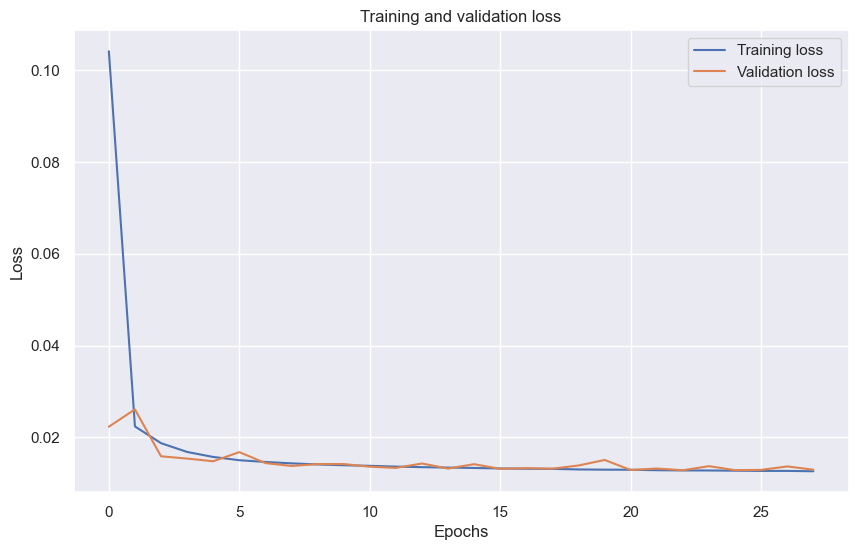

In [25]:
# instantiating the early stopping callback
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=5,
                           restore_best_weights=True)
 
# fitting the model to the training data
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=1,
                    shuffle=True,
                    use_multiprocessing=True,
                    workers=4,
                    max_queue_size=10)

# plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now lets evaluate the model on the test set.

In [26]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_test, y_test, verbose=1)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")
  
# predicting on the test set
nn_pred = model.predict(X_test)

16412/16412 [==============================] - 25s 1ms/step - loss: 0.0130
Train Loss: 0.0126
Test Loss: 0.0130
16412/16412 [==============================] - 23s 1ms/step


In [27]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, nn_pred))

# calculating the MSE
print('MSE:', mse(y_test, nn_pred))

# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, nn_pred)))

# calculating the MAPE for NN
from sklearn import metrics

mape = metrics.mean_absolute_percentage_error(y_test, nn_pred) * 100

print('MAPE:', mape)

# calculating the Accuracy
model_accuracy = 1 - mape/100
 
print('Model Accuracy:', model_accuracy)

R2 score:  0.9501857465765418
MSE: 0.012965940551438595
RMSE: 0.11386808398949459
MAPE: 0.797984929368558
Model Accuracy: 0.9920201507063144


Fantastic! The Neural Network model is performing very well.

---

## **Model Selection and Evaluation**

Now that we have our models, let's compare the scores of the models. 

| Model | R2 Score | MSE | RMSE | MAPE | Accuracy |
| --- | --- | --- | --- | --- | --- | 
| Linear Regression | 0.82 | 0.05 | 0.22 | 1.51 | 0.98 |
| Random Forest | 0.96 | 0.01 | 0.1 | 0.67 | 0.99 | 
| LightGBM | 0.94 | 0.02 | 0.12 | 0.86 | 0.99 |
| XGBoost | 0.96 | 0.01 | 0.1 | 0.72 | 0.99 |
| Neural Network | 0.95 | 0.01 | 0.11 | 0.8 | 0.99 |

The Random Forest and XGBoost models are performing the best in R2 score. But notice that Random Forest has a lower MAPE score than the XGBoost model. Since this is a regression problem, we want to minimize the error. So we will be using the Random Forest model to predict the price of a vehicle.

Lets plot the predicted values against the actual values. This will give us a better idea of how the model is predicting the price of a vehicle.

In [36]:
# Splitting the data into train and test sets
X = df.drop('price', axis=1)
y = df['price']
 
 # Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

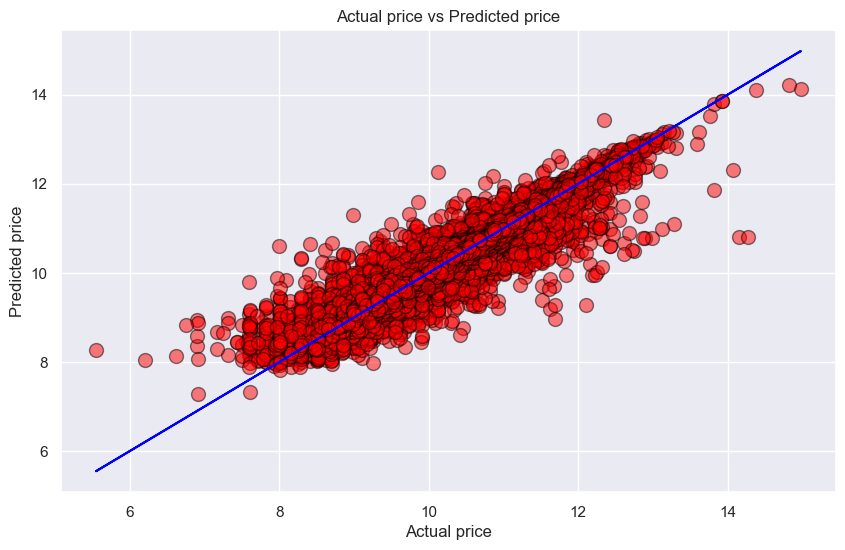

In [10]:
# plotting the actual price vs the predicted price using the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred,alpha=0.5, color='red', s=100,
            label='Predicted price', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=x
plt.plot(y_test, y_test, color='blue', label='Actual price')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show()

Notice that the predicted values are very close to the actual values. This means that the model is performing very well with the data. 

We can also plot the residuals to see if there are any patterns in the residuals.

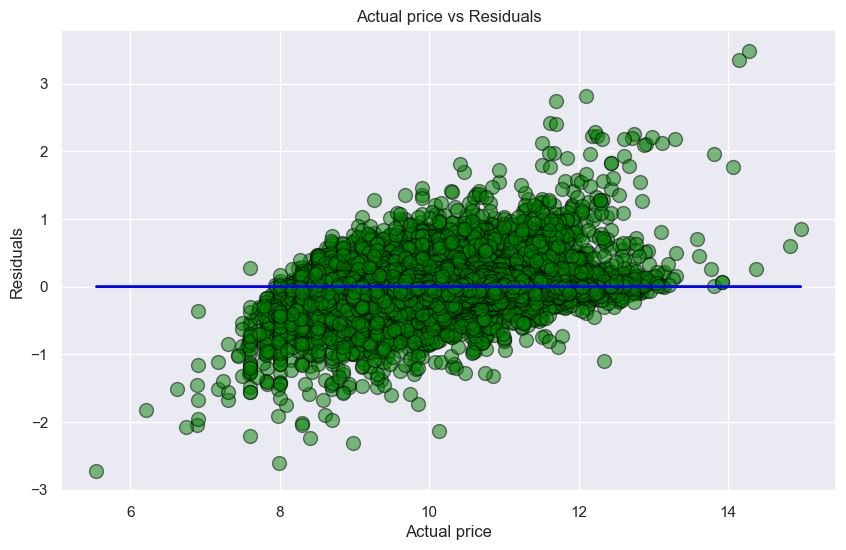

In [11]:
# plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - rf_pred, alpha=0.5, color='green', s=100,
            label='Residuals', marker='o', edgecolors='black', linewidths=1)
# plotting the line y=x
plt.plot(y_test, y_test - y_test, color='blue', label='Actual price')
plt.xlabel('Actual price')
plt.ylabel('Residuals')
plt.title('Actual price vs Residuals')
plt.show()

The residuals are randomly distributed around the zero line. This means that the model is performing very well with the data.

Another way to evaluate the model is to plot the feature importance. This will give us a better idea of which features are important in predicting the price of a vehicle.

---

## **Feature Importance**

The feature importance can give us insights into which features have a strong impact on the final vehicle price. In this project, we used several models to analyze the feature importance.

The results of the feature importance analysis can help us make informed decisions about which features to focus on in order to improve the accuracy of our predictions.

It is important to keep in mind that feature importance can vary depending on the model used and that it is not always a straightforward process. However, by analyzing feature importance, we can gain a better understanding of the underlying patterns and relationships between the features and the target variable, which can be valuable in improving our predictive models.

We will just focus on our best model, which is the Random Forest model. Let's take a look at the feature importance of the Random Forest model.

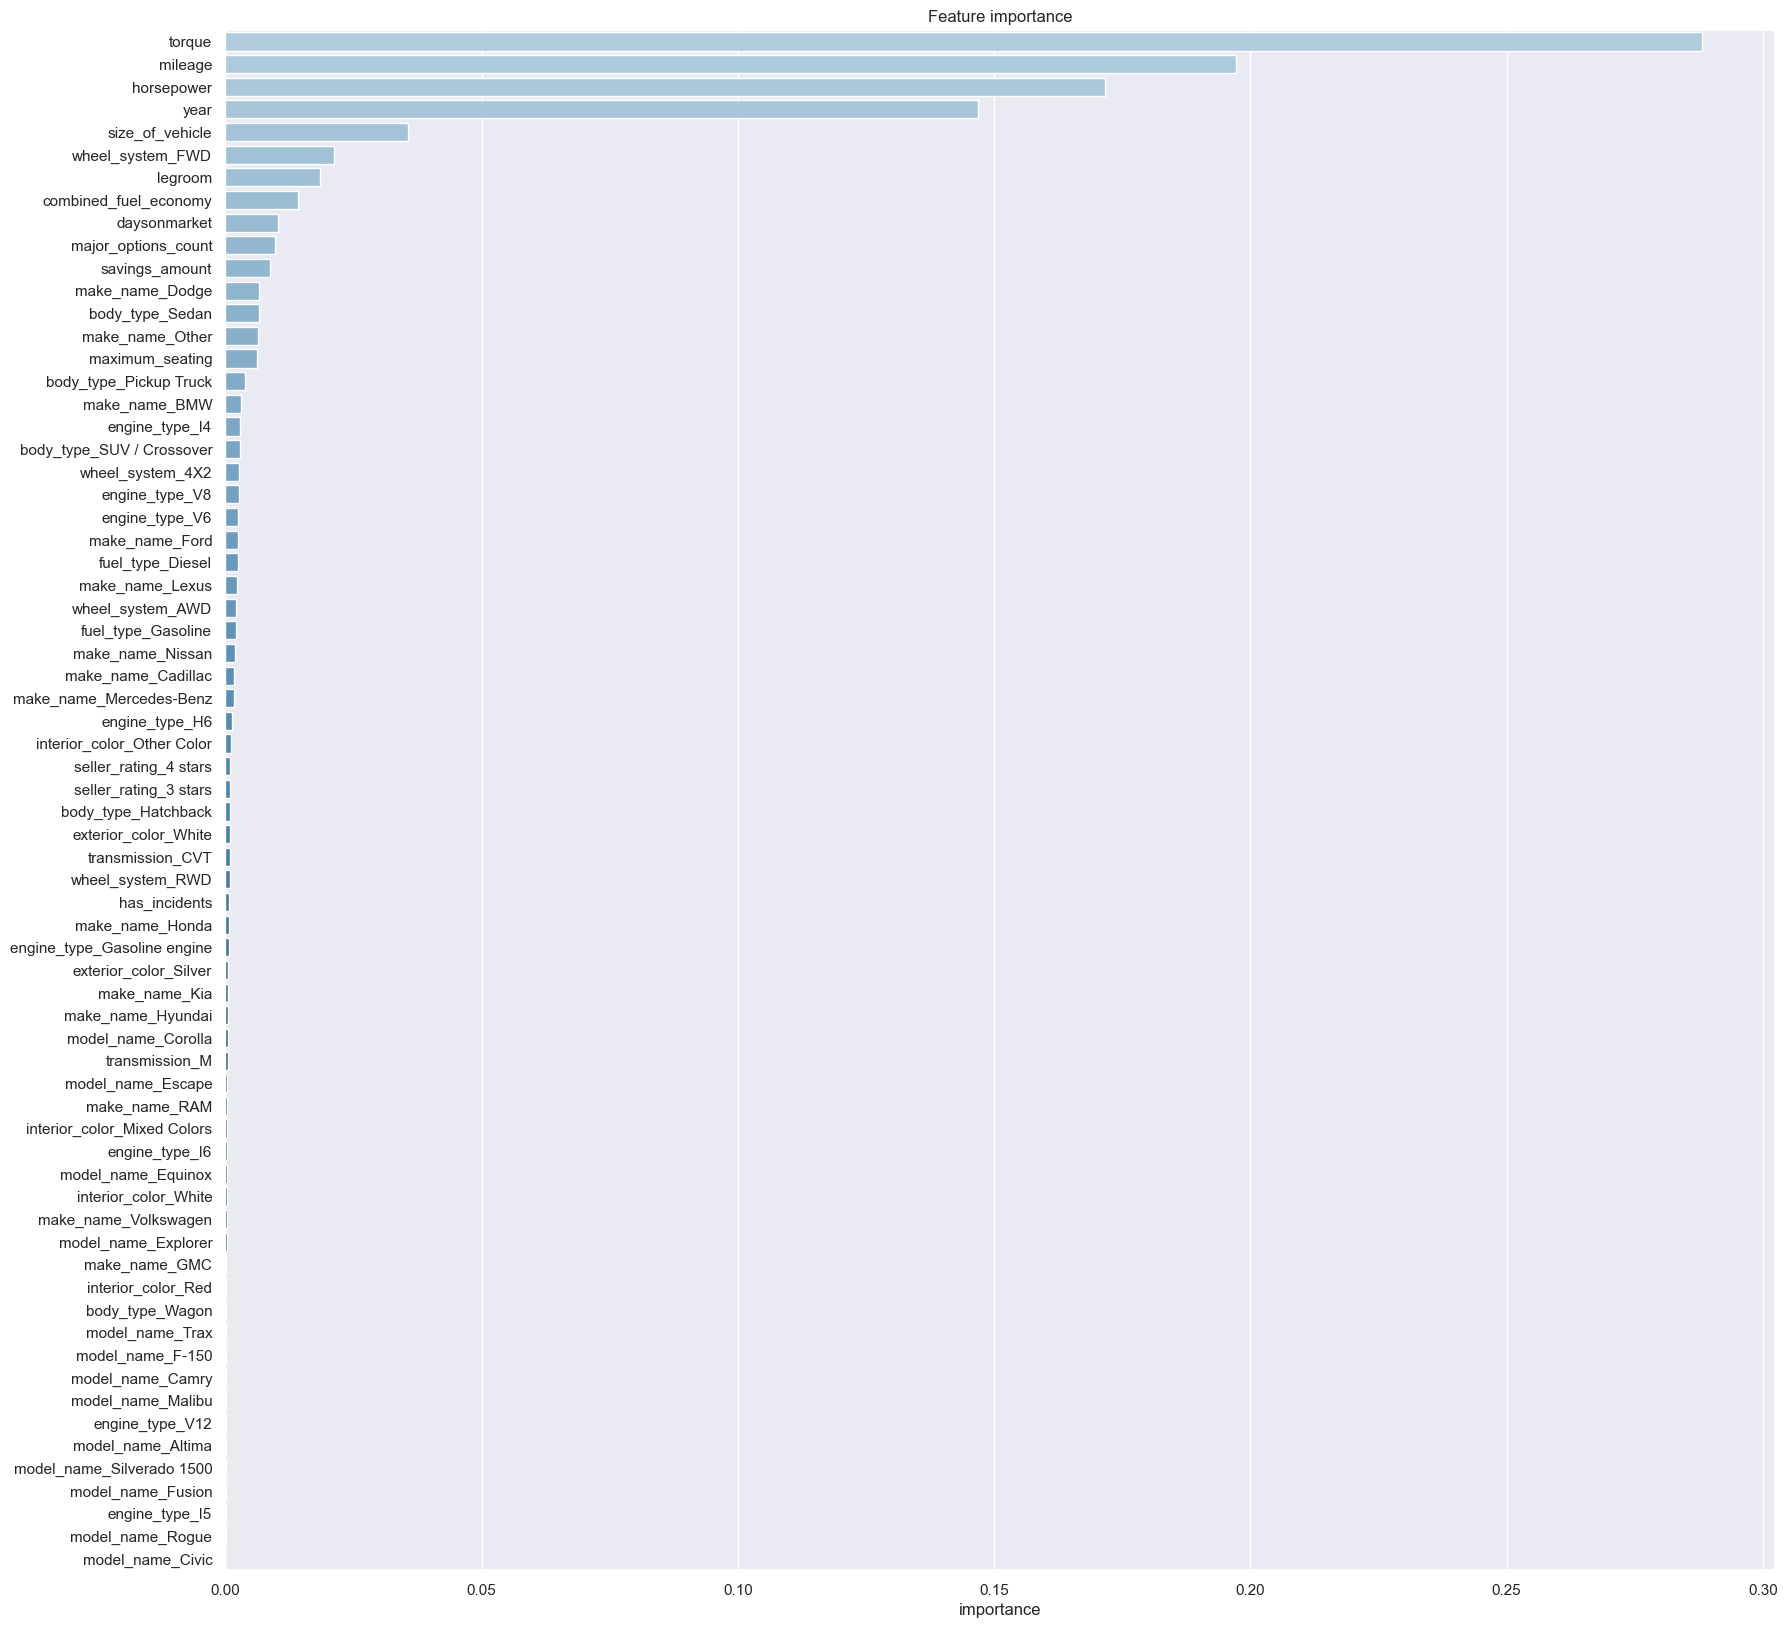

In [12]:
# plotting the importance of the features in descending order
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
 
plt.figure(figsize=(20,20))
sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='Blues_d')
plt.title('Feature importance')
plt.show()

Based on the feature importance of the Random Forest model, we can see that the most important features(anything higher than 0.05) are:

* **mileage** - the mileage of the vehicle
* **year** - the year the vehicle was manufactured
* **torque** - the torque of the vehicle
* **horsepower** - the horsepower of the vehicle

At this point, we have built our model and analyzed the feature importance. Let's see if we can improve the model by using the most important features.

In [13]:
# making a list of the features that have an importance greater than 0.01
features = feature_importances[feature_importances.importance > 0.01].index.tolist()

# creating a new dataframe with the features that have an importance greater than 0.01
X = df[features] 
y = df['price']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# importing the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# instantiating the model with the best parameters
rf = RandomForestRegressor(max_depth=30,
                           n_estimators=300,
                           n_jobs=-1,
                           random_state=1)
 
# fitting the model to the training data
rf.fit(X_train, y_train)
 
# predicting on the test set
rf_pred = rf.predict(X_test)

In [15]:
# calculating the R2 score
print('R2 score: ', r2_score(y_test, rf_pred))
 
# calculating the MSE
print('MSE:', mse(y_test, rf_pred))
 
# calculating the RMSE
print('RMSE:', np.sqrt(mse(y_test, rf_pred)))
 
# calculating the MAPE
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100
 
print('MAPE:', mape)
 
# calculating the Accuracy
model_accuracy = 1 - mape/100
 
print('Model Accuracy:', model_accuracy)

R2 score:  0.9322375223360213
MSE: 0.0176376076449554
RMSE: 0.1328066551229847
MAPE: 0.8656292799026716
Model Accuracy: 0.9913437072009733


Though the scores are slightly worse than the model with all the features, the model is still performing very well.

Let's test the predictions of the model on the test set.

In [17]:
# predicting the price of a vehicle and comparing it to the actual price using the Random Forest model
print(f"Predicted price: {rf.predict(X_test.iloc[0].values.reshape(1, -1))[0]}")
print(f"Actual price: {y_test.iloc[0]}")

Predicted price: 10.3100837847329
Actual price: 10.40420223255139


The model is predicting the price of a vehicle very well, with a 8-10 cent difference between the predicted and actual price of a vehicle.

---

## **Conclusion**
 
In conclusion, the goal of the vehicle price prediction project was to build a model that could accurately predict the price of a vehicle based on its attributes. Through the process of exploratory data analysis and feature engineering, we gained a deeper understanding of the relationships between various attributes and the target variable. The modeling process involved training and evaluating several machine learning algorithms, including linear regression, decision tree, and random forest.

After careful evaluation, the random forest model was selected as the best model for this project, with an R-squared value of 0.96 and a mean absolute percentage error of 0.67. This model demonstrated a high level of accuracy and was able to capture complex relationships between the attributes and the target variable.

This project serves as a demonstration of the power of machine learning in predicting real-world problems, and the results can be used by car dealerships or consumers to make informed decisions about vehicle prices. However, it is important to keep in mind that the model is only as good as the data it was trained on and limitations may arise when applied to new, unseen data. Further work could be done to gather additional data and improve the model's robustness.

Overall, this project highlights the importance of data exploration, feature engineering, and model selection in building a successful machine learning model.

In [ ]:
import session_info
session_info.show()